# Marketing Analytics: 

#### Customer Conversion Analysis and Decision Tree Classification

In [35]:
# Q1. Import the Bank Marketing dataset and examine structure
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bank_df = pd.read_csv('Dataset/bank-full.csv')

# Display first five observations
bank_df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Q2. Create a new binary feature named Conversion based on the target variable
# The target variable is 'y': 'yes' means converted, 'no' means not converted
bank_df['Conversion'] = bank_df['Target'].apply(lambda x: 1 if x == 'yes' else 0)

bank_df[['Target', 'Conversion']].head()

,Target,Conversion
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


Top 3 education levels by conversion rate:
education
tertiary     0.150064
unknown      0.135703
secondary    0.105594
Name: Conversion, dtype: float64


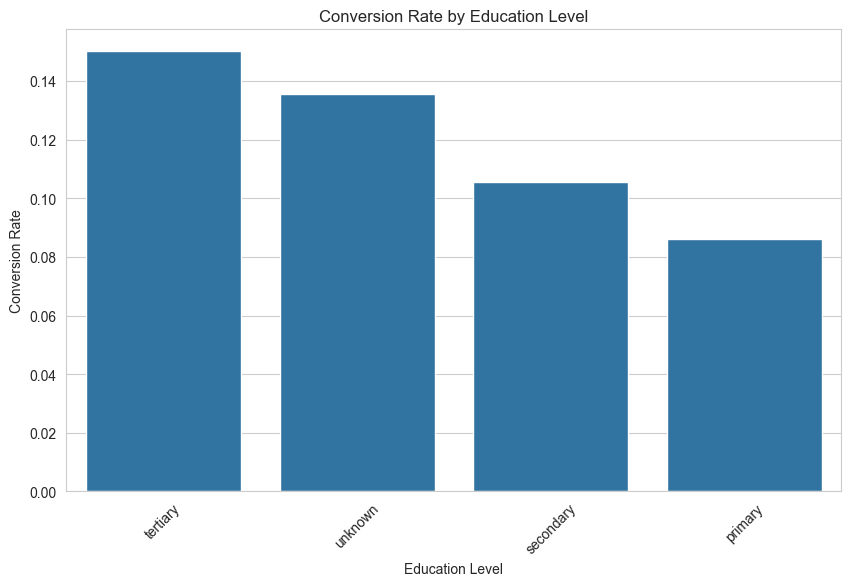

In [37]:
# Q3. Compute conversion rate for each education level and visualize
conversion_by_education = bank_df.groupby('education')['Conversion'].mean().sort_values(ascending=False)

# Top 3 education levels
top3_education = conversion_by_education.head(3)
print("Top 3 education levels by conversion rate:")
print(top3_education)

# Bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=conversion_by_education.index, y=conversion_by_education.values)
plt.title('Conversion Rate by Education Level')
plt.ylabel('Conversion Rate')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Q4. Encode categorical variables education and default
from sklearn.preprocessing import LabelEncoder

le_education = LabelEncoder()
le_default = LabelEncoder()
bank_df['education_encoded'] = le_education.fit_transform(bank_df['education'])
bank_df['default_encoded'] = le_default.fit_transform(bank_df['default'])

# Show encoded columns
bank_df[['education', 'education_encoded', 'default', 'default_encoded']].head()

,education,education_encoded,default,default_encoded
0,tertiary,2,no,0
1,secondary,1,no,0
2,secondary,1,no,0
3,unknown,3,no,0
4,unknown,3,no,0


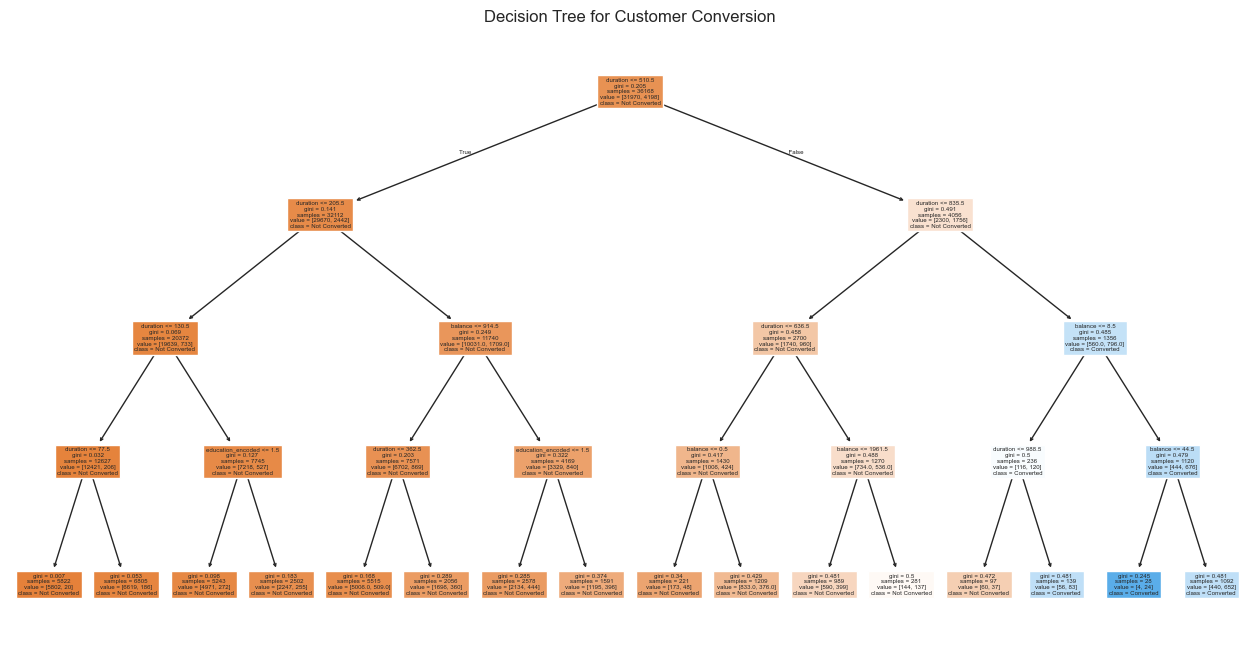

Feature Importances:
duration             0.944858
balance              0.040218
education_encoded    0.014925
default_encoded      0.000000
dtype: float64


In [39]:
# Q5. Decision Tree classifier with balance, duration, education, and default
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Features and target
features = ['balance', 'duration', 'education_encoded', 'default_encoded']
X = bank_df[features]
y = bank_df['Conversion']

# Handle missing values if any
X = X.fillna(X.mean())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)

# Plot tree
plt.figure(figsize=(16,8))
plot_tree(dtree, feature_names=features, class_names=['Not Converted', 'Converted'], filled=True)
plt.title('Decision Tree for Customer Conversion')
plt.show()

# Feature importance
importances = pd.Series(dtree.feature_importances_, index=features)
print("Feature Importances:")
print(importances.sort_values(ascending=False))

#### Exploratory Data Analysis and Customer Conversion Prediction 

In [40]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Q1. Load the Bank Marketing dataset and examine structure
import matplotlib.pyplot as plt

bank_df = pd.read_csv('Dataset/bank-full.csv')
print("First five records:")
print(bank_df.head())
print("\nDataset info:")
print(bank_df.info())

First five records:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 en

In [41]:
# Q2. Create a binary Conversion variable from the target attribute
# Assuming the target column is named 'y' with values 'yes' (converted) and 'no' (not converted)
bank_df['Conversion'] = bank_df['Target'].apply(lambda x: 1 if x == 'yes' else 0)
print("\nConversion variable created: 1 = Converted, 0 = Not Converted")
print(bank_df[['Target', 'Conversion']].head())


Conversion variable created: 1 = Converted, 0 = Not Converted
  Target  Conversion
0     no           0
1     no           0
2     no           0
3     no           0
4     no           0


In [42]:
# Q3. Basic EDA
print("\nDataset shape:", bank_df.shape)
print("\nData types:\n", bank_df.dtypes)
print("\nMissing values:\n", bank_df.isnull().sum())
print("\nDescriptive statistics:\n", bank_df.describe(include='all'))


Dataset shape: (45211, 18)

Data types:
 age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
Target        object
Conversion     int64
dtype: object

Missing values:
 age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
Target        0
Conversion    0
dtype: int64

Descriptive statistics:
                  age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2


Top 3 Marital Status by Conversion Rate:
marital
single      0.149492
divorced    0.119455
married     0.101235
Name: Conversion, dtype: float64

Top 3 Job Categories by Conversion Rate:
job
student       0.286780
retired       0.227915
unemployed    0.155027
Name: Conversion, dtype: float64


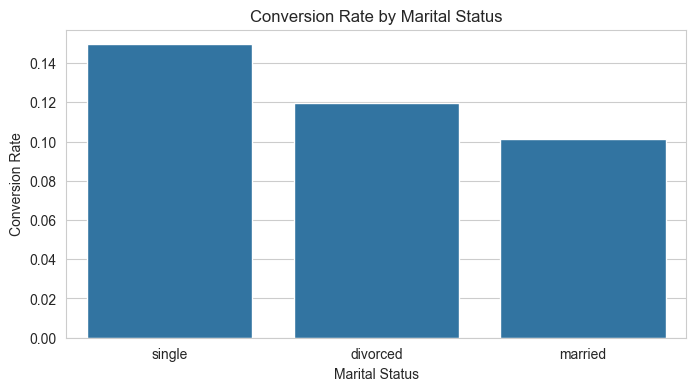

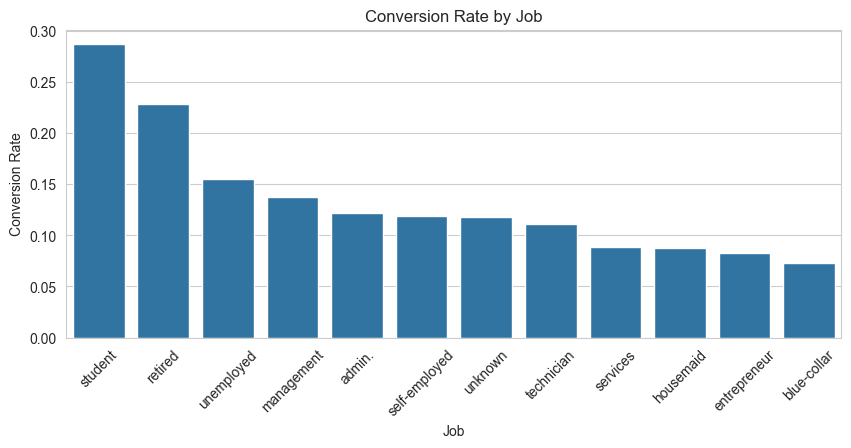

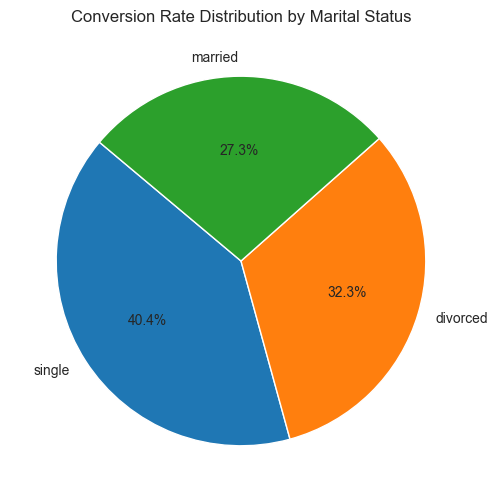

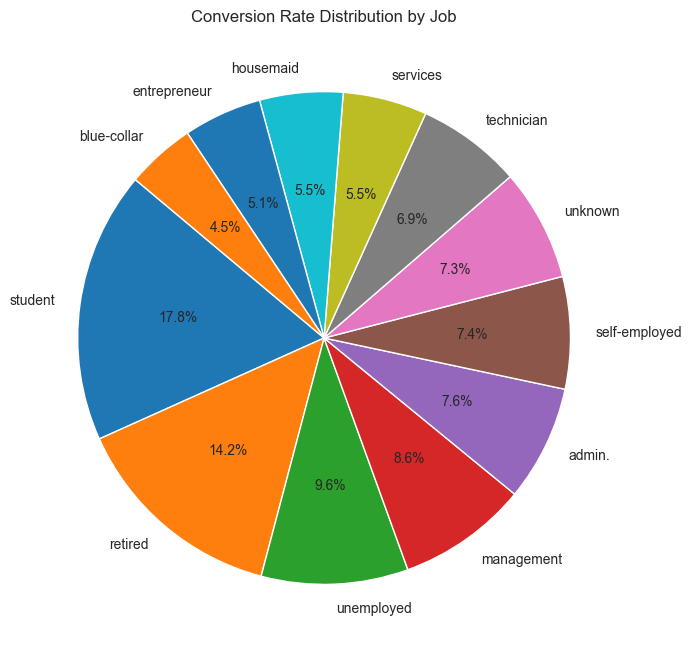

In [43]:
# Q4. Conversion rate by Marital Status and Job
marital_conv = bank_df.groupby('marital')['Conversion'].mean().sort_values(ascending=False)
job_conv = bank_df.groupby('job')['Conversion'].mean().sort_values(ascending=False)

print("\nTop 3 Marital Status by Conversion Rate:")
print(marital_conv.head(3))
print("\nTop 3 Job Categories by Conversion Rate:")
print(job_conv.head(3))

plt.figure(figsize=(8,4))
sns.barplot(x=marital_conv.index, y=marital_conv.values)
plt.title('Conversion Rate by Marital Status')
plt.ylabel('Conversion Rate')
plt.xlabel('Marital Status')
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(x=job_conv.index, y=job_conv.values)
plt.title('Conversion Rate by Job')
plt.ylabel('Conversion Rate')
plt.xlabel('Job')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,6))
plt.pie(marital_conv.values, labels=marital_conv.index, autopct='%1.1f%%', startangle=140)
plt.title('Conversion Rate Distribution by Marital Status')
plt.show()

plt.figure(figsize=(8,8))
plt.pie(job_conv.values, labels=job_conv.index, autopct='%1.1f%%', startangle=140)
plt.title('Conversion Rate Distribution by Job')
plt.show()

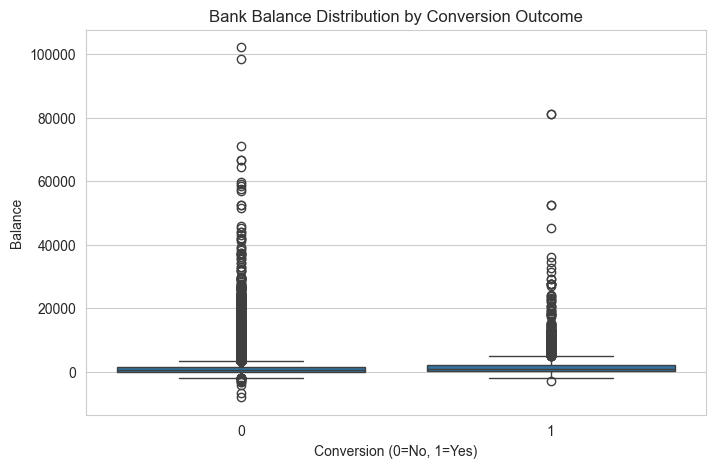

In [44]:
# Q5. Boxplot: average bank balances by conversion outcome
plt.figure(figsize=(8,5))
sns.boxplot(x='Conversion', y='balance', data=bank_df)
plt.title('Bank Balance Distribution by Conversion Outcome')
plt.xlabel('Conversion (0=No, 1=Yes)')
plt.ylabel('Balance')
plt.show()


Default rates by Conversion status:
 Conversion      0     1
default                
no          39159  5237
yes           763    52


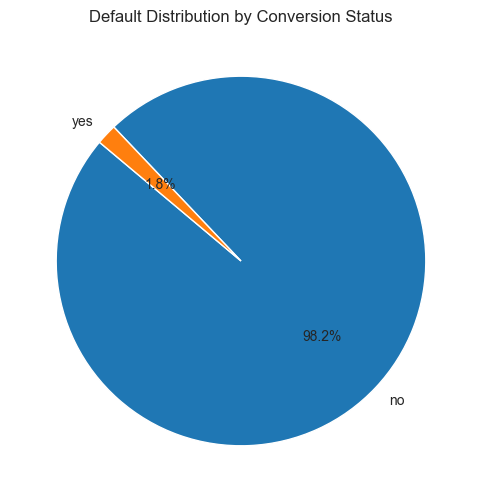

In [45]:
# Q6. Pivot table: default rates by conversion status and pie chart
default_pivot = bank_df.pivot_table(index='default', columns='Conversion', aggfunc='size', fill_value=0)
print("\nDefault rates by Conversion status:\n", default_pivot)

default_counts = bank_df.groupby(['default', 'Conversion']).size().unstack(fill_value=0)
default_rate = default_counts.sum(axis=1)
plt.figure(figsize=(6,6))
plt.pie(default_rate, labels=default_rate.index, autopct='%1.1f%%', startangle=140)
plt.title('Default Distribution by Conversion Status')
plt.show()

In [46]:
# Q7. Encoding technique for 'month'
# Justification: Ordinal encoding is not appropriate since months are cyclical, so One-Hot Encoding is preferred.
month_encoded = pd.get_dummies(bank_df['month'], prefix='month')
print("\nMonth encoded using One-Hot Encoding:\n", month_encoded.head())


Month encoded using One-Hot Encoding:
    month_apr  month_aug  month_dec  month_feb  month_jan  month_jul  \
0      False      False      False      False      False      False   
1      False      False      False      False      False      False   
2      False      False      False      False      False      False   
3      False      False      False      False      False      False   
4      False      False      False      False      False      False   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  
0      False      False       True      False      False      False  
1      False      False       True      False      False      False  
2      False      False       True      False      False      False  
3      False      False       True      False      False      False  
4      False      False       True      False      False      False  


In [47]:
# Q8. Encode job, marital, housing, loan

for col in ['job', 'marital', 'housing', 'loan']:
    bank_df[col + '_encoded'] = LabelEncoder().fit_transform(bank_df[col])
print("\nEncoded categorical variables:\n", bank_df[['job', 'job_encoded', 'marital', 'marital_encoded', 'housing', 'housing_encoded', 'loan', 'loan_encoded']].head())


Encoded categorical variables:
             job  job_encoded  marital  marital_encoded housing  \
0    management            4  married                1     yes   
1    technician            9   single                2     yes   
2  entrepreneur            2  married                1     yes   
3   blue-collar            1  married                1     yes   
4       unknown           11   single                2      no   

   housing_encoded loan  loan_encoded  
0                1   no             0  
1                1   no             0  
2                1  yes             1  
3                1   no             0  
4                0   no             0  


In [48]:
# Q9. Train Decision Tree classifier

features = ['age', 'balance', 'campaign', 'previous', 'housing_encoded', 'loan_encoded', 'job_encoded', 'marital_encoded']
X = bank_df[features]
y = bank_df['Conversion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


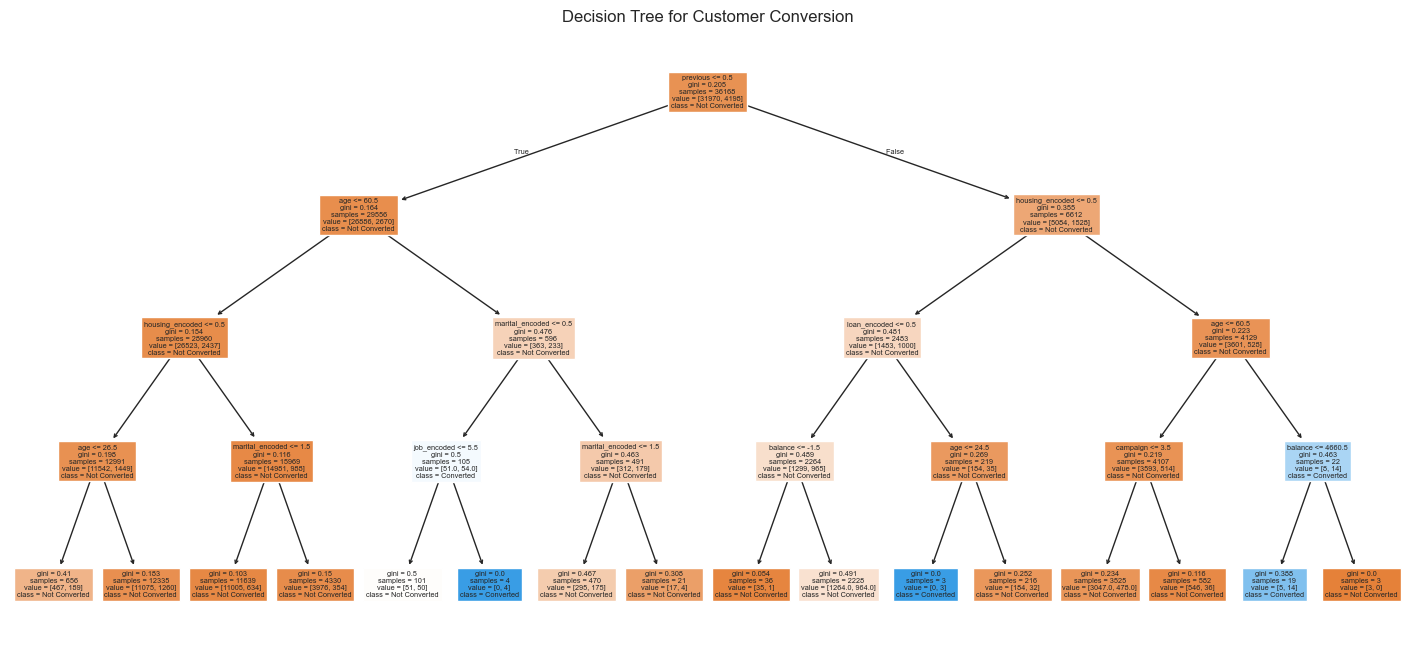


Feature Importances:
housing_encoded    0.378401
previous           0.300476
age                0.236809
loan_encoded       0.039782
balance            0.020250
marital_encoded    0.013902
campaign           0.007625
job_encoded        0.002754
dtype: float64


In [49]:
# Q10. Visualize decision tree and interpret
plt.figure(figsize=(18,8))
plot_tree(dtree, feature_names=features, class_names=['Not Converted', 'Converted'], filled=True)
plt.title('Decision Tree for Customer Conversion')
plt.show()

importances = pd.Series(dtree.feature_importances_, index=features)
print("\nFeature Importances:")
print(importances.sort_values(ascending=False))


Interpretation: The most influential features are those with the highest importance scores. Key decision rules can be read from the tree visualization.